# Deber 4 -  Deep Learning

Para ello, se utiliza el conjunto de datos Fashion MNIST, el cual es un conjunto de imágenes que representa prendas de ropa en escala de grises. 
Fashion MNIST consta de 60,000 imágenes. Cada imagen tiene un tamaño de 28x28 píxeles y pertenece a una de las 10 categorías de prendas de vestir. 

Estas categorías incluyen:
 
- Camiseta/top
- Pantalón
- Suéter
- Vestido
- Abrigo
- Sandalia
- Camisa
- Zapatilla deportiva
- Bolso
- Botín


In [1]:
# 0. Importamos las librerias necesarias

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

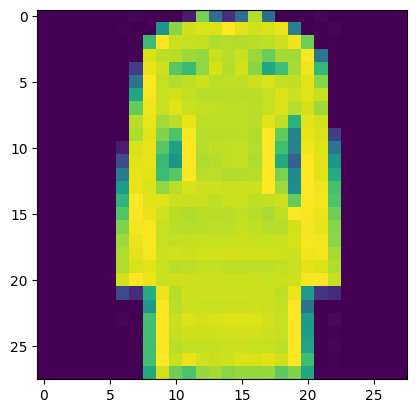

In [3]:
# 1. Cargamos los datos  de entrenamiento y pruebas, además del dataset de datos
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

'''Mostramos la imagen de datos'''
plt.imshow(x_train[500])

In [4]:
# 2. Preparamos los datos, conocemos el tamaño de datos y transormamos a binario
x_train.shape

x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

# 3. Combiamos la forma de datos en escala de grises y su tamaño de pixeles 28op * 28p
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

## Arquitectura de la red neuronal convulcional

In [5]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# 3. Definimos las capas de esta red, siendo el mecanismo princpial de análisis de datos

'''A. Capa Convulcional: Incluye filtros, kernel, función de activación y forma de entrada'''
convulcional_ly = Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(28, 28, 1))

'''B. Capa de Agrupamiento: Incluye cada región de 2x2 pixeles de entrada, se reducen a uno solo'''
agrupamiento_ly = MaxPooling2D(pool_size=(2,2))

'''C. Capa de Aplanamiento'''
aplanamiento_ly = Flatten()

'''D. Capas ocultas: Incluyen los números de neuronas componentes de estoss elementos'''
ocultas_ly = Dense(units=64, activation="relu")

'''E. Capa de salida'''
salida_ly = Dense(units=10, activation="softmax")

# 3.1. Definimos el modelo
modelo = keras.Sequential([convulcional_ly, agrupamiento_ly, aplanamiento_ly, ocultas_ly, salida_ly])

C:\Users\bryan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


## Agrupación de datos, categorización y entrenamiento del modelo


In [6]:
# 4. Compilamos el modelo
modelo.compile(optimizer='adam', loss='categorical_crossentropy',metrics=["accuracy"])

# 5. Pasamos a categorización los datos, con 10 salidas
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# 6. Entrenamos el modelo
modelo.fit(x_train,y_train,batch_size=128, epochs=5)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.7678 - loss: 0.6901
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8822 - loss: 0.3350
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8978 - loss: 0.2880
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9095 - loss: 0.2571
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9161 - loss: 0.2350


## Evaluación del modelo

In [7]:
# 7. Evaluamos modelo con los datos de prueba
func_perdida = modelo.evaluate(x_test,y_test)
print("La función de perdida es: ",func_perdida[0])
print("La precision es: ",func_perdida[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9016 - loss: 0.2768
La función de perdida es:  0.27048957347869873
La precision es:  0.9035000205039978


## Lectura de imagenes con el modelo evaluado

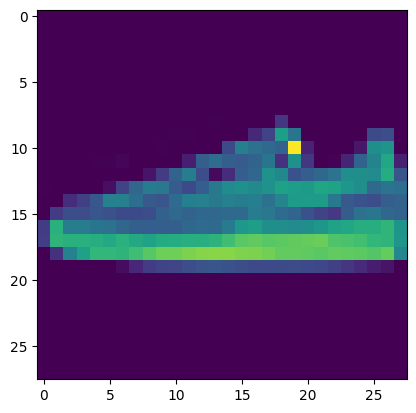

In [10]:
# 8. Leemos el modelo para verificar la eficiencia
imagen=x_test[580]
plt.imshow(imagen)